## Tarea Eigenfaces

Creado por: María Alejandra Perpiñán Barrios

### Elección del dataset
El conjunto de datos utilizado en este ejemplo es un extracto preprocesado de "Labeled Faces in the Wild".

In [1]:
import sklearn
from sklearn import datasets
faces = sklearn.datasets.fetch_lfw_people(min_faces_per_person=50, resize=0.4)
faces.data.shape

(1560, 1850)

Visualización de 15 de las caras con las que se estará trabajando.

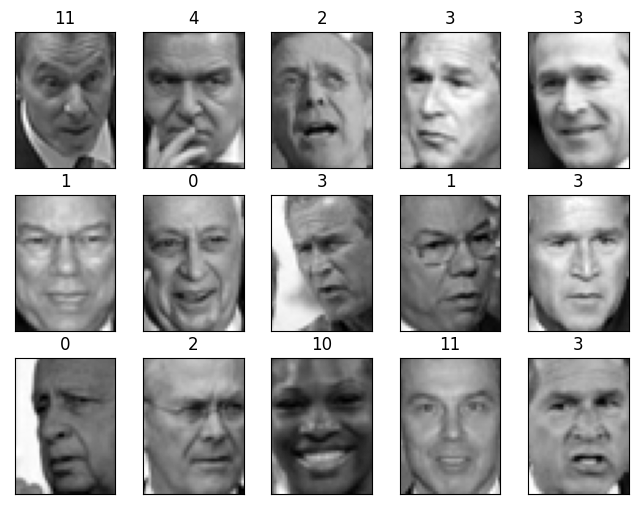

In [2]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.gray)
    plt.title(faces.target[i])

### Implementación: Principal Component Analysis

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
        faces.target, random_state=0)

print('Tamaño conjunto de entrenamiento:', X_train.shape)
print('Tamaño conjunto de prueba:', X_test.shape)

Tamaño conjunto de entrenamiento: (1170, 1850)
Tamaño conjunto de prueba: (390, 1850)


Voy a crear 500 eigenfaces (esta cantidad se puede modificar con el parámetro n_components), estos son nuestros componentes principales de los cuales recuperaremos nuestros datos que son rostro humano. 

In [4]:
from sklearn import decomposition
eigenfaces = decomposition.PCA(n_components=300, whiten=True)
eigenfaces.fit(X_train)

PCA(n_components=300, whiten=True)

A continuación se muestra el cálculo de la cara "media" de acuerdo al conjunto de datos que se tiene

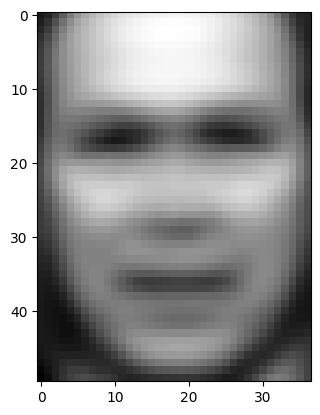

In [5]:
plt.imshow(eigenfaces.mean_.reshape(faces.images[0].shape),
           cmap=plt.cm.gray)

### Eigenfaces que mejor explican una imagen del conjunto de datos

A continuación se muestra el top 30 de los eigenfaces más significativos en la explicación del conjunto de datos. Los eigenfaces están ordenados por su importancia de arriba a la izquierda a abajo a la derecha. Vemos que los primeros componentes parecen ocuparse principalmente de las condiciones de iluminación; del resto de componentes se desprenden ciertos rasgos identificativos: la nariz, los ojos, las cejas, etc.

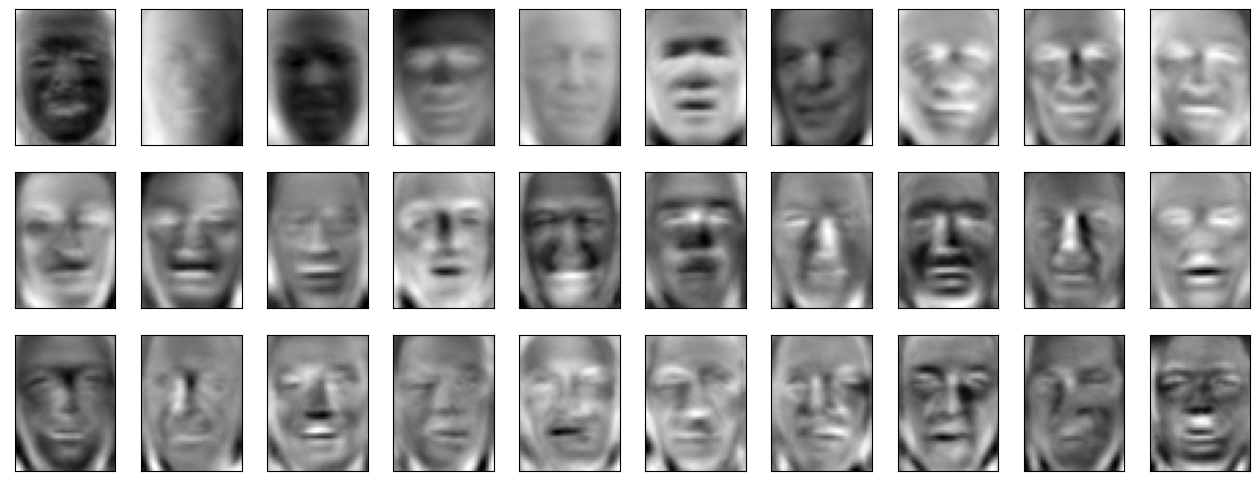

In [6]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(eigenfaces.components_[i].reshape(faces.images[0].shape),
              cmap=plt.cm.gray)

In [7]:
X_train_pca = eigenfaces.transform(X_train)
X_test_pca = eigenfaces.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(1170, 300)
(390, 300)


### Aprendizaje con Support Vector Machine

In [8]:
%%time
from sklearn import svm
clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train)

CPU times: total: 219 ms
Wall time: 261 ms


SVC(C=5.0, gamma=0.001)

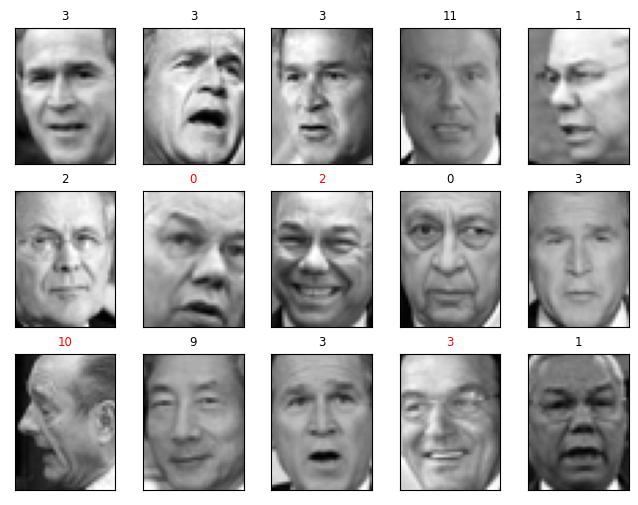

In [9]:
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.gray)
    y_pred = clf.predict(X_test_pca[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)

A continuación se muestra un informe de clasificación, que muestra la precisión, sensibilidad y otras medidas de que tan buena es la clasificación

In [10]:
from sklearn import metrics
y_pred = clf.predict(X_test_pca)
print("Predicción de los nombres de las personas en el conjunto de prueba")
print(metrics.classification_report(y_test, y_pred))

Predicción de los nombres de las personas en el conjunto de prueba
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        15
           1       0.81      0.78      0.80        65
           2       0.61      0.66      0.63        29
           3       0.76      0.95      0.85       133
           4       0.91      0.64      0.75        33
           5       0.72      0.81      0.76        16
           6       0.80      0.33      0.47        12
           7       0.71      0.50      0.59        10
           8       1.00      0.44      0.62        18
           9       0.82      0.82      0.82        11
          10       0.86      0.63      0.73        19
          11       0.77      0.79      0.78        29

    accuracy                           0.77       390
   macro avg       0.79      0.67      0.71       390
weighted avg       0.79      0.77      0.77       390

